In [2]:
data = {"ChatGPT": [5, 2, 4, 4, 2, 1, 3, 6, 1, 4], "DeepSeek": [5, 2, 4, 3, 2, 1, 3, 5, 1, 3], "Gemini": [5, 3, 4, 6, 2, 1, 4, 6, 1, 6], "Llama": [5, 2, 6, 4, 2, 1, 4, 5, 1, 5]}
cot_data = {"ChatGPT": [3, 2, 6, 6, 3, 1, 3, 5, 1, 4], "DeepSeek": [5, 2, 6, 3, 2, 2, 3, 4, 2, 3], "Gemini": [3, 2, 6, 4, 2, 1, 6, 4, 1, 5], "Llama": [5, 2, 4, 3, 2, 1, 3, 6, 1, 2]}

In [39]:
import pandas as pd
import plotly.graph_objects as go

# Convert data to DataFrame
df = pd.DataFrame(data)
cot_df = pd.DataFrame(cot_data)

# Sum the scores for each LLM for both standard and COT prompts
standard_totals = df.sum()
cot_totals = cot_df.sum()

# Calculate the difference between the standard and COT totals for each LLM
score_difference = cot_totals - standard_totals

# Create final table with LLM names, standard scores, COT scores, and their difference
final_df = pd.DataFrame({
    "Standard Scores": standard_totals,
    "COT Scores": cot_totals,
    "Score Difference": score_difference
})

# Create a Plotly table with the specified blue header and white background
fig = go.Figure(data=[go.Table(
    header=dict(
        values=["LLM", "Standard Scores", "COT Scores", "Score Difference"],
        fill_color='#1f77b4',  # Custom blue header color (hex code)
        font=dict(color='white', size=14),  # White text on blue header
        align='center',
        line_color='black',  # Black borders for header
    ),
    cells=dict(
        values=[final_df.index, final_df['Standard Scores'], final_df['COT Scores'], final_df['Score Difference']],
        fill_color='white',  # White background for table cells
        font=dict(color='black', size=12),  # Black text for table cells
        align='center',
        line_color='black',  # Black borders for cells
        height=30  # Adjust row height
    ),
)])

# Adjust the column widths using the 'columnwidth' argument in the layout
fig.update_layout(
    margin=dict(t=50, b=50, l=50, r=50),
    xaxis=dict(tickangle=-45),
    width=600  # Optional: Adjust the overall width of the figure
)

# Adjust the table column widths (this needs to be done through layout instead of cells)
fig.update_traces(
    columnwidth=[150, 250, 250, 250]  # Adjusting the widths of the columns
)

# Show the table
fig.show()


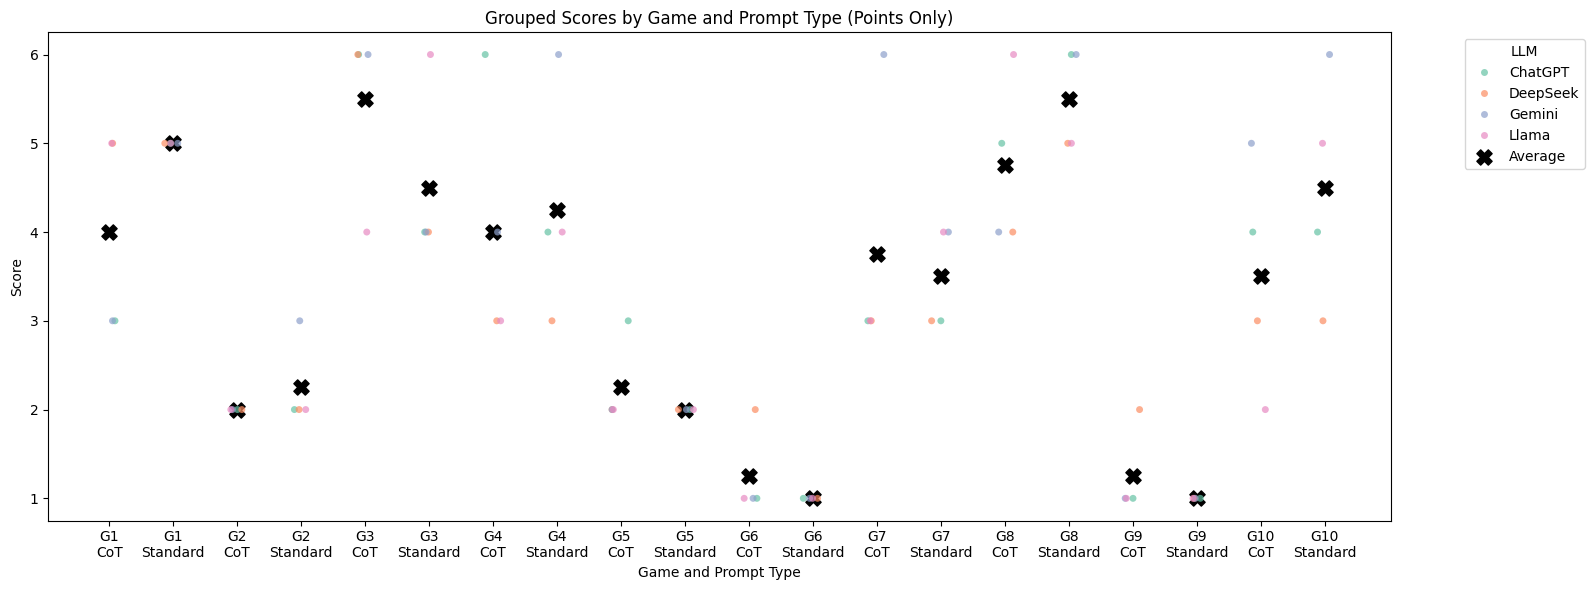

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Raw data
data = {
    "ChatGPT": [5, 2, 4, 4, 2, 1, 3, 6, 1, 4],
    "DeepSeek": [5, 2, 4, 3, 2, 1, 3, 5, 1, 3],
    "Gemini": [5, 3, 4, 6, 2, 1, 4, 6, 1, 6],
    "Llama": [5, 2, 6, 4, 2, 1, 4, 5, 1, 5]
}

cot_data = {
    "ChatGPT": [3, 2, 6, 6, 3, 1, 3, 5, 1, 4],
    "DeepSeek": [5, 2, 6, 3, 2, 2, 3, 4, 2, 3],
    "Gemini": [3, 2, 6, 4, 2, 1, 6, 4, 1, 5],
    "Llama": [5, 2, 4, 3, 2, 1, 3, 6, 1, 2]
}

# Convert to DataFrames
df = pd.DataFrame(data)
cot_df = pd.DataFrame(cot_data)

# Reshape and label
df_long = df.reset_index().melt(id_vars='index', var_name='LLM', value_name='Score')
df_long['Game'] = df_long['index'] + 1
df_long['Prompt'] = 'Standard'
df_long = df_long.drop(columns='index')

cot_df_long = cot_df.reset_index().melt(id_vars='index', var_name='LLM', value_name='Score')
cot_df_long['Game'] = cot_df_long['index'] + 1
cot_df_long['Prompt'] = 'CoT'
cot_df_long = cot_df_long.drop(columns='index')

# Combine
combined_df = pd.concat([df_long, cot_df_long], ignore_index=True)

# Create new x-axis positions like in a grouped bar chart
combined_df['Group'] = combined_df['Game'].astype(str) + '_' + combined_df['Prompt']
group_order = sorted(combined_df['Group'].unique(), key=lambda x: (int(x.split('_')[0]), x.split('_')[1]))
group_to_x = {group: i for i, group in enumerate(group_order)}
combined_df['GroupX'] = combined_df['Group'].map(group_to_x)

# Compute averages
avg_df = combined_df.groupby(['GroupX']).agg({'Score': 'mean'}).reset_index()
avg_df['Group'] = [k for k, v in group_to_x.items() if v in avg_df['GroupX'].values]
avg_df['Game'] = avg_df['Group'].str.extract(r'^(\d+)_').astype(int)
avg_df['Prompt'] = avg_df['Group'].str.extract(r'_(CoT|Standard)')
avg_df['Label'] = 'Average'

# Plot
plt.figure(figsize=(16, 6))

# Individual points
sns.stripplot(
    data=combined_df,
    x='GroupX',
    y='Score',
    hue='LLM',
    dodge=False,
    jitter=0.15,
    palette='Set2',
    alpha=0.7
)

# Overlay averages
plt.scatter(
    x=avg_df['GroupX'],
    y=avg_df['Score'],
    color='black',
    marker='X',
    s=120,
    label='Average'
)

# Custom x-tick labels
xticks = list(group_to_x.values())
xtick_labels = [f'G{group.split("_")[0]}\n{group.split("_")[1]}' for group in group_order]
plt.xticks(ticks=xticks, labels=xtick_labels)

# Labels and formatting
plt.xlabel('Game and Prompt Type')
plt.ylabel('Score')
plt.title('Grouped Scores by Game and Prompt Type (Points Only)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='LLM')
plt.tight_layout()
plt.show()


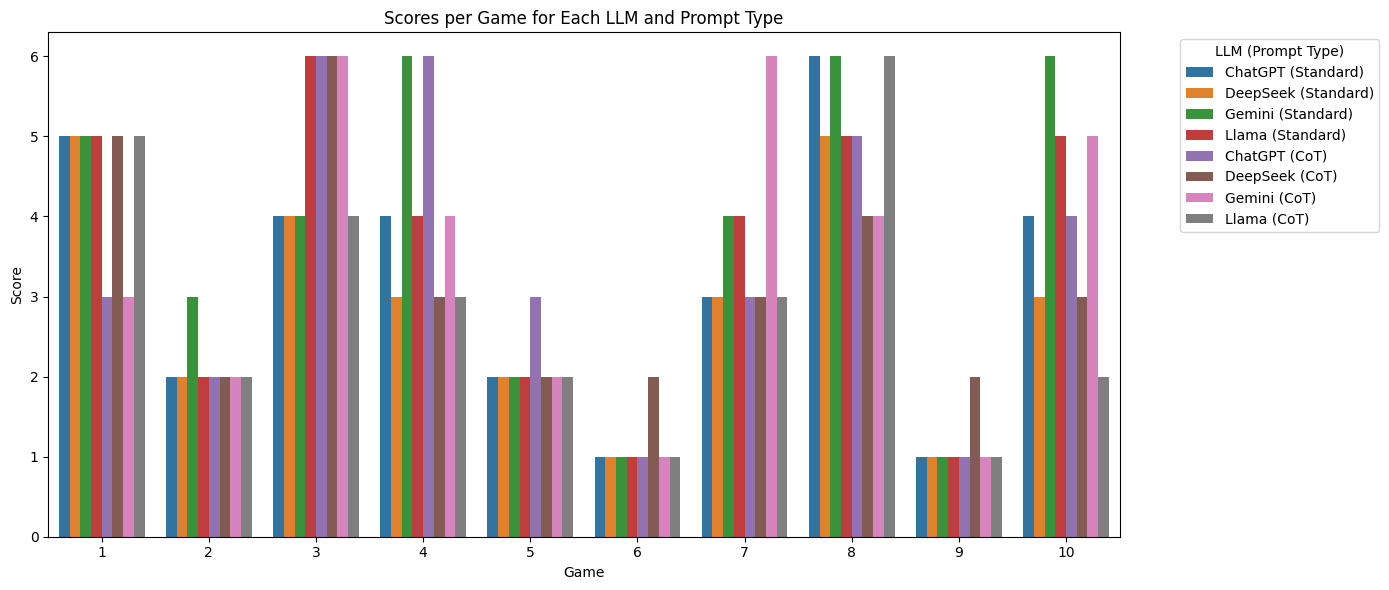

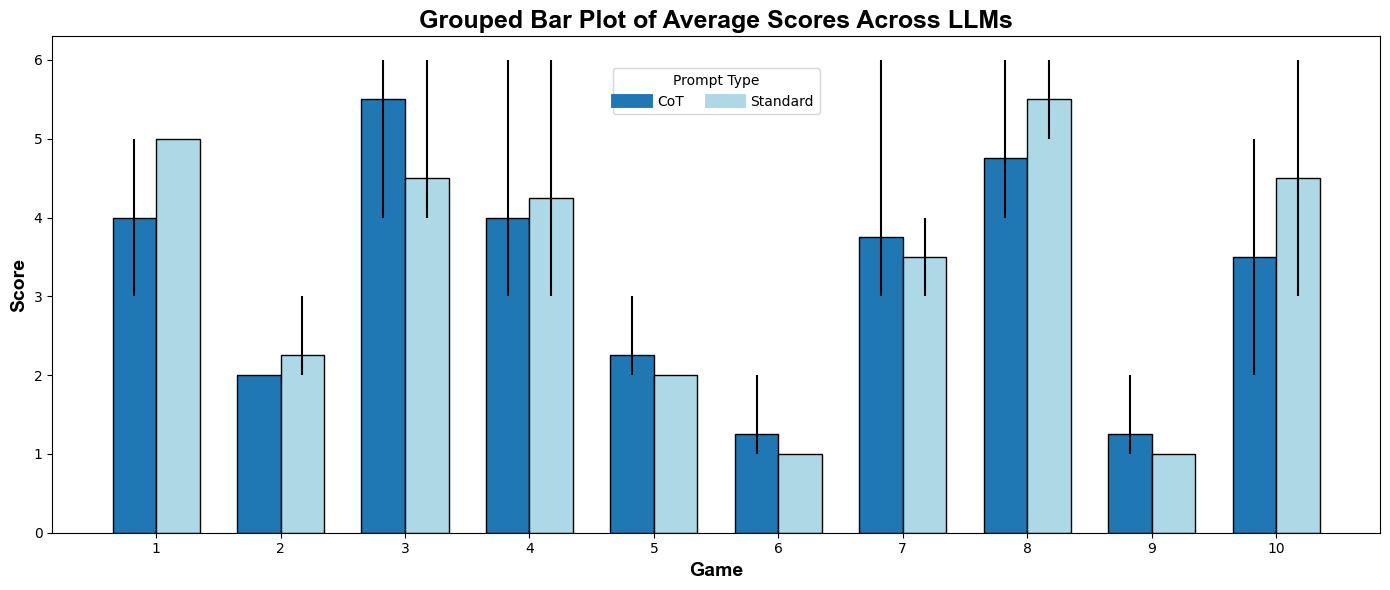

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Raw data
data = {
    "ChatGPT": [5, 2, 4, 4, 2, 1, 3, 6, 1, 4],
    "DeepSeek": [5, 2, 4, 3, 2, 1, 3, 5, 1, 3],
    "Gemini": [5, 3, 4, 6, 2, 1, 4, 6, 1, 6],
    "Llama": [5, 2, 6, 4, 2, 1, 4, 5, 1, 5]
}

cot_data = {
    "ChatGPT": [3, 2, 6, 6, 3, 1, 3, 5, 1, 4],
    "DeepSeek": [5, 2, 6, 3, 2, 2, 3, 4, 2, 3],
    "Gemini": [3, 2, 6, 4, 2, 1, 6, 4, 1, 5],
    "Llama": [5, 2, 4, 3, 2, 1, 3, 6, 1, 2]
}

# Convert to DataFrames
df = pd.DataFrame(data)
cot_df = pd.DataFrame(cot_data)

# Reshape and label
df_long = df.reset_index().melt(id_vars='index', var_name='LLM', value_name='Score')
df_long['Game'] = df_long['index'] + 1
df_long['Prompt'] = 'Standard'
df_long = df_long.drop(columns='index')

cot_df_long = cot_df.reset_index().melt(id_vars='index', var_name='LLM', value_name='Score')
cot_df_long['Game'] = cot_df_long['index'] + 1
cot_df_long['Prompt'] = 'CoT'
cot_df_long = cot_df_long.drop(columns='index')

# Combine datasets
combined_df = pd.concat([df_long, cot_df_long], ignore_index=True)

# Aggregate: min, max, mean per Game+Prompt
agg_df = combined_df.groupby(['Game', 'Prompt']).agg(
    mean_score=('Score', 'mean'),
    min_score=('Score', 'min'),
    max_score=('Score', 'max')
).reset_index()

# Set up positions for bars (Standard on left, CoT on right)
prompt_order = ['Standard', 'CoT']
x_pos = []
width = 0.35  # Width of the bars

for game in sorted(agg_df['Game'].unique()):
    x_pos.append(game - width/2)  # Position for CoT bar
    x_pos.append(game + width/2)  # Position for Standard bar

agg_df['x'] = x_pos

# Plot
plt.figure(figsize=(14, 6))

# Plot bars with light blue and standard blue
bar_container = plt.bar(
    agg_df['x'],
    agg_df['mean_score'],
    color=['#add8e6' if p == 'Standard' else '#1f77b4' for p in agg_df['Prompt']],  # Light blue for Standard, Standard blue for CoT
    edgecolor='black',
    width=width
)

# Add whiskers (min to max)
for i, row in agg_df.iterrows():
    plt.vlines(
        x=row['x'],
        ymin=row['min_score'],
        ymax=row['max_score'],
        color='black',
        linewidth=1.5
    )

# Customize x-ticks and labels
plt.xticks(ticks=range(1, 11), labels=[str(i) for i in range(1, 11)])  # Games 1-10
plt.xlabel('Game', fontsize=14, fontweight='bold', fontname='Arial')
plt.ylabel('Score', fontsize=14, fontweight='bold', fontname='Arial')
plt.title('Grouped Bar Plot of Average Scores Across LLMs', fontsize=18, fontweight='bold', fontname='Arial')

# Customize legend: Positioning it at the top center
legend_elements = [
    plt.Line2D([0], [0], color='#1f77b4', lw=10, label='CoT'),
    plt.Line2D([0], [0], color='#add8e6', lw=10, label='Standard')
]
plt.legend(handles=legend_elements, title='Prompt Type', bbox_to_anchor=(0.5, 0.95), loc='upper center', ncol=2)

# Layout adjustment
plt.tight_layout()
plt.show()


In [28]:
import pandas as pd

# Raw data for Standard and CoT scores
data = {
    "ChatGPT": [5, 2, 4, 4, 2, 1, 3, 6, 1, 4],
    "DeepSeek": [5, 2, 4, 3, 2, 1, 3, 5, 1, 3],
    "Gemini": [5, 3, 4, 6, 2, 1, 4, 6, 1, 6],
    "Llama": [5, 2, 6, 4, 2, 1, 4, 5, 1, 5]
}

cot_data = {
    "ChatGPT": [3, 2, 6, 6, 3, 1, 3, 5, 1, 4],
    "DeepSeek": [5, 2, 6, 3, 2, 2, 3, 4, 2, 3],
    "Gemini": [3, 2, 6, 4, 2, 1, 6, 4, 1, 5],
    "Llama": [5, 2, 4, 3, 2, 1, 3, 6, 1, 2]
}

# Convert to DataFrames
df = pd.DataFrame(data)
cot_df = pd.DataFrame(cot_data)

# Compute average scores for each game (across LLMs) for both Standard and CoT
standard_avg_per_game = df.mean(axis=1)  # Mean of rows (games) for Standard data
cot_avg_per_game = cot_df.mean(axis=1)  # Mean of rows (games) for CoT data

# Compute the difference between Standard and CoT averages for each game
difference_per_game = standard_avg_per_game - cot_avg_per_game

# Compute the average of these differences
average_difference_across_games = difference_per_game.mean()

# Print the result
print("Average Difference across games between Standard and CoT scores:")
print(average_difference_across_games)


Average Difference across games between Standard and CoT scores:
0.125
